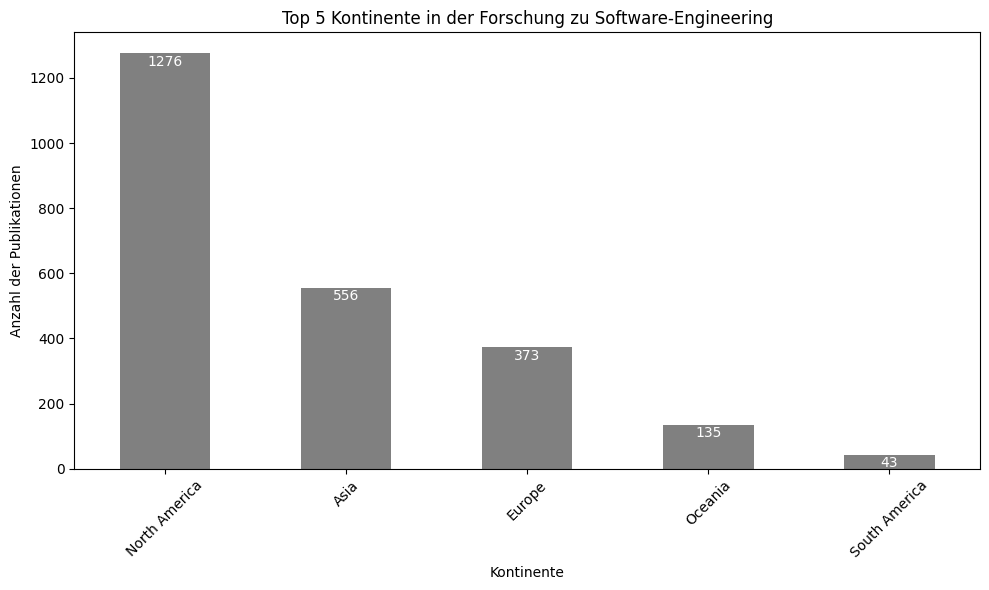

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import os

# Den Pfad zur CSV-Datei definieren (angenommen, sie liegt im 'Data'-Ordner deines Projekts)
csv_file_path = os.path.join(os.getcwd(), '..', 'Data', 'Dataset.csv')

# CSV-Datei einlesen
df = pd.read_csv(csv_file_path)

#-------------------------------------------------------------------------------
# Extrahieren der Länder aus den Affiliations (letzter Teil nach dem Komma)
if 'Country' not in df.columns:
    df['Country'] = df['Author Affiliations'].dropna().apply(lambda x: x.split(',')[-1].strip())

# Zuordnung von Ländern zu Kontinenten (vereinfachtes Mapping, ggf. erweitern)
continent_mapping = {
    'USA': 'North America',
    'Canada': 'North America',
    'Mexico': 'North America',
    'Brazil': 'South America',
    'Argentina': 'South America',
    'Germany': 'Europe',
    'France': 'Europe',
    'UK': 'Europe',
    'China': 'Asia',
    'India': 'Asia',
    'Japan': 'Asia',
    'Australia': 'Oceania',
    'New Zealand': 'Oceania',
    'South Africa': 'Africa',
    'Nigeria': 'Africa',
    'Egypt': 'Africa'
}

# Zuordnung zu Kontinenten
df['Continent'] = df['Country'].map(continent_mapping).fillna('Other')

# Liste der Länder, die als "Other" eingestuft wurden
other_countries = df[df['Continent'] == 'Other']['Country'].unique()

# Manuelle Zuordnung von Kontinenten zu Ländern aus der "Other"-Liste
additional_mapping = {
    'Country1': 'Europe',
    'Country2': 'Asia',
}

# Zuordnung von Kontinenten zu den "Other"-Ländern, wenn bekannt
df['Continent'] = df.apply(
    lambda row: additional_mapping.get(row['Country'], row['Continent']), axis=1
)

# Länder, die weiterhin als "Other" klassifiziert sind (keine bekannten Zuordnungen)
remaining_other_countries = df[df['Continent'] == 'Other']['Country'].unique()

# Aktualisierte Auswertung: Top 5 Kontinente ohne "Other"
continent_counts = df[df['Continent'] != 'Other']['Continent'].value_counts()
top_continents = continent_counts.head(5)


# Visualisierung der Top 5 Kontinente ohne "Other"
plt.figure(figsize=(10, 6))
top_continents.plot(kind='bar', color='gray')
plt.title('Top 5 Kontinente in der Forschung zu Software-Engineering')
plt.ylabel('Anzahl der Publikationen')
plt.xlabel('Kontinente')
plt.xticks(rotation=45)

# Werte auf die Balken schreiben
for index, value in enumerate(top_continents):
    plt.text(index, value - max(top_continents) * 0.03, str(value), ha='center', color='white')


plt.tight_layout()
plt.show()

